<a href="https://colab.research.google.com/github/Amangiri99/CarDekho_Car_Prediction/blob/master/CarDekho_DS_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes = True)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [378]:
df = pd.read_csv("/content/drive/My Drive/Data/car data.csv")

In [379]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Investigating the data 

In [380]:
df.shape

(301, 9)

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [382]:
#Converting year to datetime from int
#df['year'] = pd.to_datetime(df.year , format = '%Y')

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [384]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [385]:
def checkUnique(row, column):
    print(column +":")
    print(np.unique(row))
    print()

checkUnique(df.Fuel_Type , "Fuel")
checkUnique(df.Seller_Type , "Seller Type")
checkUnique(df.Transmission , "Transmission")


Fuel:
['CNG' 'Diesel' 'Petrol']

Seller Type:
['Dealer' 'Individual']

Transmission:
['Automatic' 'Manual']



Before applying machine learning algorithm we will convert the object data_types to int after visualization

Visualization

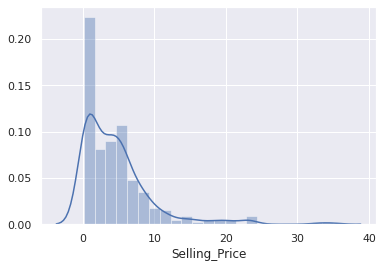

In [386]:
sns.distplot(df['Selling_Price'] , kde = True);

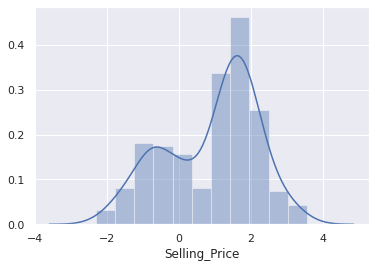

In [387]:
sns.distplot(np.log(df['Selling_Price']) ,kde = True);

In [388]:
df['Selling_Price'] = np.log(df['Selling_Price'])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,1.208960,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,1.558145,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,1.981001,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,1.047319,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,1.526056,6.87,42450,Diesel,Dealer,Manual,0


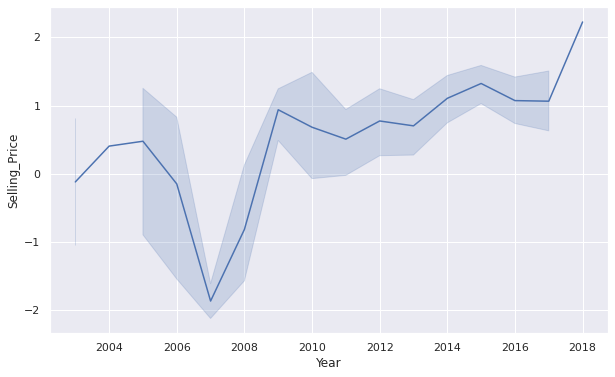

In [389]:
#Seeing the trend over time between Selling price and Year

sns.lineplot(df.Year , df.Selling_Price);
fig = plt.gcf()
fig.set_size_inches(10,6);

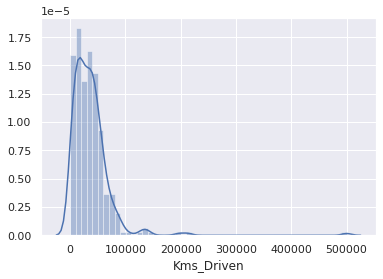

In [390]:
sns.distplot(df['Kms_Driven'] , kde = True);

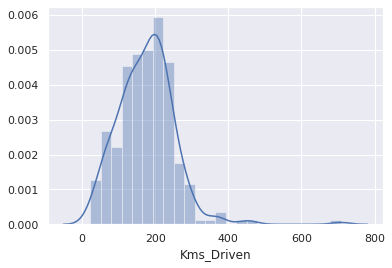

In [391]:
sns.distplot(np.sqrt(df['Kms_Driven']) , kde = True);

In [392]:
df['Kms_Driven'] = np.log(df['Kms_Driven'])

Fuel_Type
CNG         2
Diesel     60
Petrol    239
Name: Fuel_Type, dtype: int64


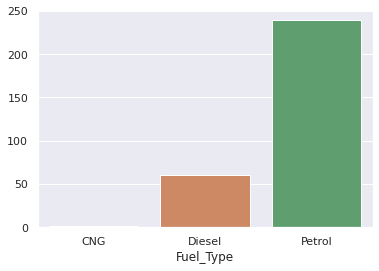

In [393]:
#Bar plot showing the number of vechiles depending upon the type of fuel used

c = df.groupby('Fuel_Type')['Fuel_Type'].count()
sns.barplot(x =  c.index , y = c.values);
print(c)

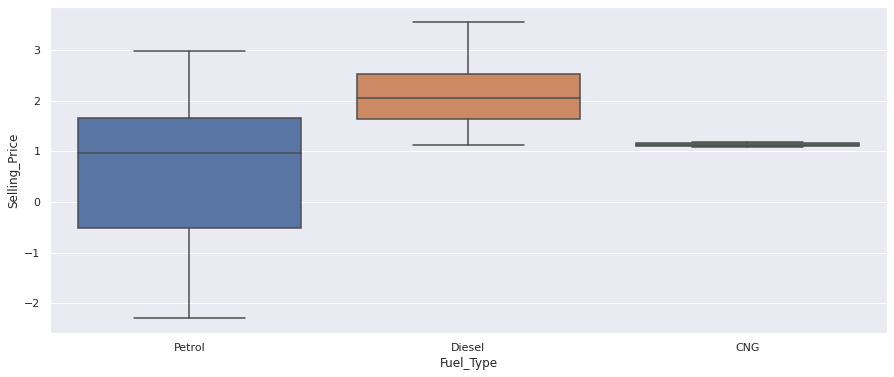

In [394]:
#Distribution of selling price with respeect to fuel type

sns.boxplot(x = df['Fuel_Type'] , y = df['Selling_Price'])
fig = plt.gcf()
fig.set_size_inches(15,6);

Transmission
Automatic     40
Manual       261
Name: Transmission, dtype: int64


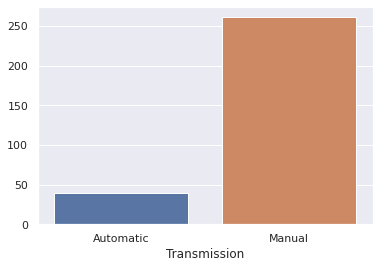

In [395]:
trans = df.groupby('Transmission')['Transmission'].count();
sns.barplot(x = trans.index , y = trans.values);
print(trans)

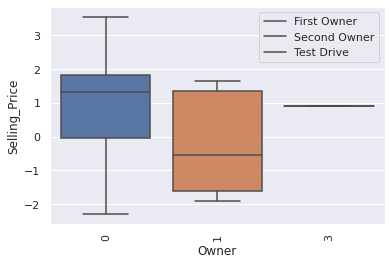

In [396]:
#Distribution of selling price with respeect to owner type
sns.boxplot(x = df['Owner'] , y = df['Selling_Price'])
plt.legend(['First Owner' , 'Second Owner' , 'Test Drive'])
plt.xticks(rotation = 90);

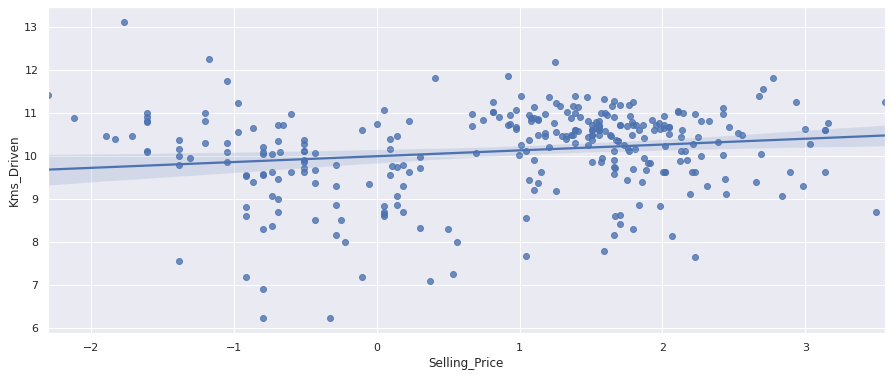

In [397]:
#Joint plot for relationship between km_driven and the selling price of the vehicle

sns.regplot(x = df['Selling_Price'], y = df['Kms_Driven'] );
fig = plt.gcf()
fig.set_size_inches(15,6);

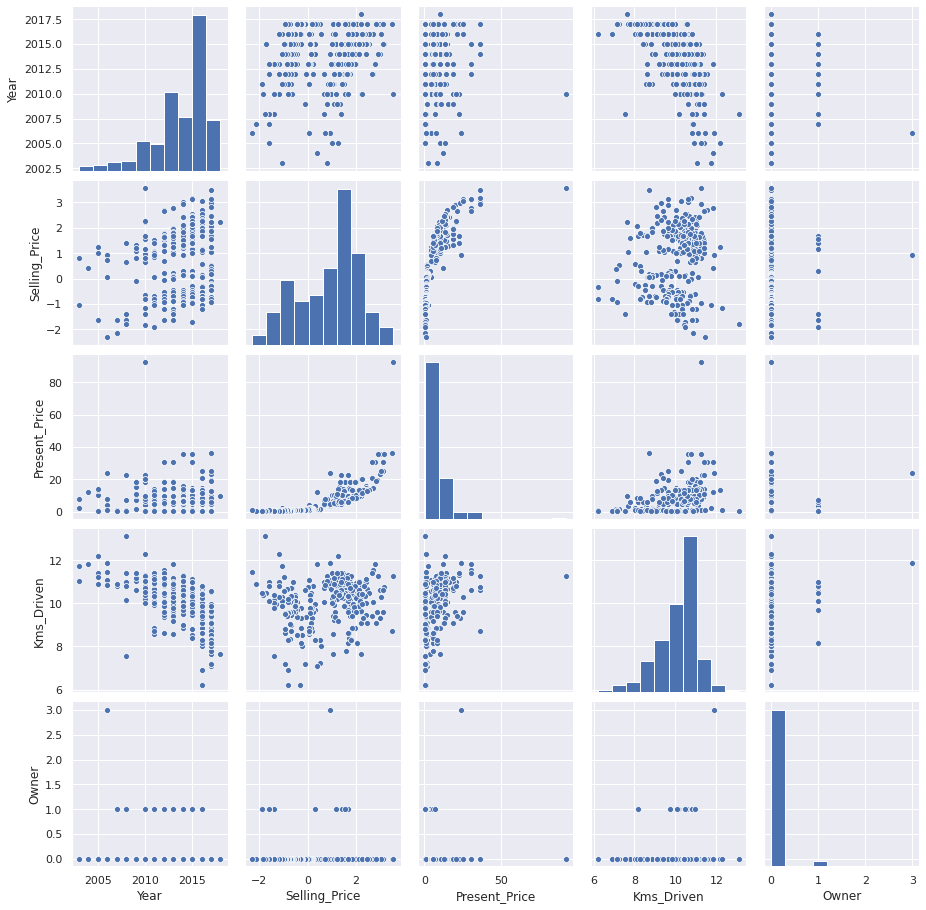

In [398]:
sns.pairplot(df)

Bringing some changes to the data set for better prediction

Converting object into integer for fuel type

---
1. CNG - 0
2. Diesel - 1
3. Petrol - 2


In [ ]:
fuel = {'CNG':0,'Diesel':1,'Petrol':2}
def changes(df):
    for i,fuel_type in enumerate(df.Fuel_Type):
        df['Fuel_Type'][i] = fuel[fuel_type]

changes(df)

Converting object to integer for seller type

---
1. Dealer - 1
2.Individual - 2

In [ ]:
seller = {'Dealer':1,'Individual':2}
def changes(df):
    for i,Seller_Type in enumerate(df.Seller_Type):
        df['Seller_Type'][i] = seller[Seller_Type]

changes(df)

Converting object to integer in Transmiison type

---
1. Automatic - 1
2. Manual - 0

In [ ]:
trans = {'Automatic':1,'Manual':0}
def changes(df):
    for i,type_of in enumerate(df.Transmission):
        df['Transmission'][i] = trans[type_of]

changes(df)

In [402]:
df['Fuel_Type'] = pd.to_numeric(df['Fuel_Type']);
df['Seller_Type'] = pd.to_numeric(df['Seller_Type']);
df['Transmission'] = pd.to_numeric(df['Transmission']);

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 21.3+ KB


In [404]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,1.208960,5.59,10.203592,2,1,0,0
1,sx4,2013,1.558145,9.54,10.668955,1,1,0,0
2,ciaz,2017,1.981001,9.85,8.839277,2,1,0,0
3,wagon r,2011,1.047319,4.15,8.556414,2,1,0,0
4,swift,2014,1.526056,6.87,10.656082,1,1,0,0


In [405]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.272282,-0.047584,-0.545249,-0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.272282,1.000000,0.705845,0.170268,-0.456973,-0.851627,0.175041,-0.117410
Present_Price,-0.047584,0.705845,1.000000,0.296159,-0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.545249,0.170268,0.296159,1.000000,-0.260903,-0.321632,0.019486,0.074260
Fuel_Type,-0.053643,-0.456973,-0.440415,-0.260903,1.000000,0.352415,-0.080466,0.055705
Seller_Type,-0.039896,-0.851627,-0.512030,-0.321632,0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.175041,0.348715,0.019486,-0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.117410,0.008057,0.074260,0.055705,0.124269,0.050316,1.000000


In [406]:
from sklearn import preprocessing,model_selection,svm
from sklearn.linear_model import LinearRegression


In [408]:
df = df.drop('Car_Name' , axis = 1);

In [409]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,1.208960,5.59,10.203592,2,1,0,0
1,2013,1.558145,9.54,10.668955,1,1,0,0
2,2017,1.981001,9.85,8.839277,2,1,0,0
3,2011,1.047319,4.15,8.556414,2,1,0,0
4,2014,1.526056,6.87,10.656082,1,1,0,0


In [411]:
y = pd.DataFrame(df['Selling_Price'])
X = (df.drop(['Selling_Price'] , axis = 1))

In [412]:
X = preprocessing.scale(X)

In [413]:
print(X.shape,y.shape)

(301, 7) (301, 1)


In [414]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2)

In [415]:
clf = LinearRegression()

In [417]:
clf.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [418]:
accuracy = clf.score(X_test,y_test)

In [419]:
print(accuracy)

0.9004880334548954


In [422]:
# Calculating Loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# MAE on training data 
print("MAE: ", mean_absolute_error(y_true=y_train, y_pred=clf.predict(X_train)))

# MSE on training data
print("MSE: ", mean_squared_error(y_true=y_train, y_pred=clf.predict(X_train)))

MAE:  0.28621135678597037
MSE:  0.173053390416984
